# **Analysing IPL Data**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
ball = pd.read_csv('../input/ipl-complete-dataset-20082020/IPL Ball-by-Ball 2008-2020.csv')
matches = pd.read_csv('../input/ipl-complete-dataset-20082020/IPL Matches 2008-2020.csv')

In [3]:
ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
matches["season"]=pd.DatetimeIndex(matches["date"]).year

In [6]:
matches.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


Added a new column called 'season' that contains the year of the matches.

In [7]:
ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
 17  season          

In [9]:
ball.describe()

,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket
count,1.934680e+05,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000,193468.000000
mean,7.567688e+05,1.482131,9.177027,3.615967,1.240231,0.066414,1.306645,0.000083,0.049078
std,3.060971e+05,0.499682,5.676848,1.807128,1.610867,0.339991,1.598802,0.009094,0.216031
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.012270e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.292970e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.082628e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.237181e+06,2.000000,19.000000,9.000000,6.000000,7.000000,7.000000,1.000000,1.000000


In [10]:
matches.describe()

,id,neutral_venue,result_margin,season
count,8.160000e+02,816.000000,799.000000,816.000000
mean,7.563496e+05,0.094363,17.321652,2013.926471
std,3.058943e+05,0.292512,22.068427,3.665054
min,3.359820e+05,0.000000,1.000000,2008.000000
25%,5.012278e+05,0.000000,6.000000,2011.000000
50%,7.292980e+05,0.000000,8.000000,2014.000000
75%,1.082626e+06,0.000000,19.500000,2017.000000
max,1.237181e+06,1.000000,146.000000,2020.000000


In [11]:
ball.shape

(193468, 18)

In [12]:
matches.shape

(816, 18)

In [13]:
print(f"The matches set has {matches.isnull().sum().sum()} missing values, and the ball set has {ball.isnull().sum().sum()}.")

The matches set has 843 missing values, and the ball set has 738056.


**From this we can see that the matches dataset contains 816 rows and 17 columns. Also the 'city', 'player_of_match', 'winner', 'result', 'result_margin', 'eliminator' and 'method' columns contain missing values. It has a total of 843 missing values. We have 14 categorical columns and 3 numerical ones.**

**The ball dataset whereas contains 193468 rows and 18 columns. In this 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type' contain missing values. It has a total of 738056 missing values. We have 9 categorical columns and 9 numerical ones.**

# **Exploratory Data Analysis**

<Figure size 1296x1152 with 0 Axes>

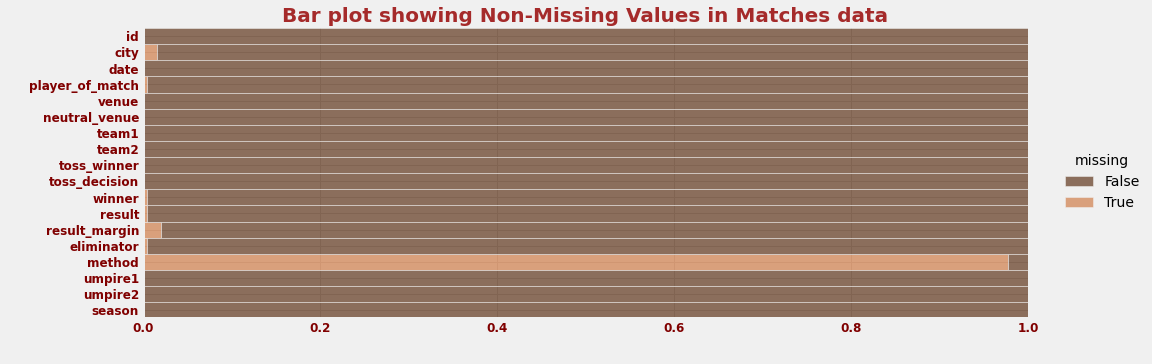

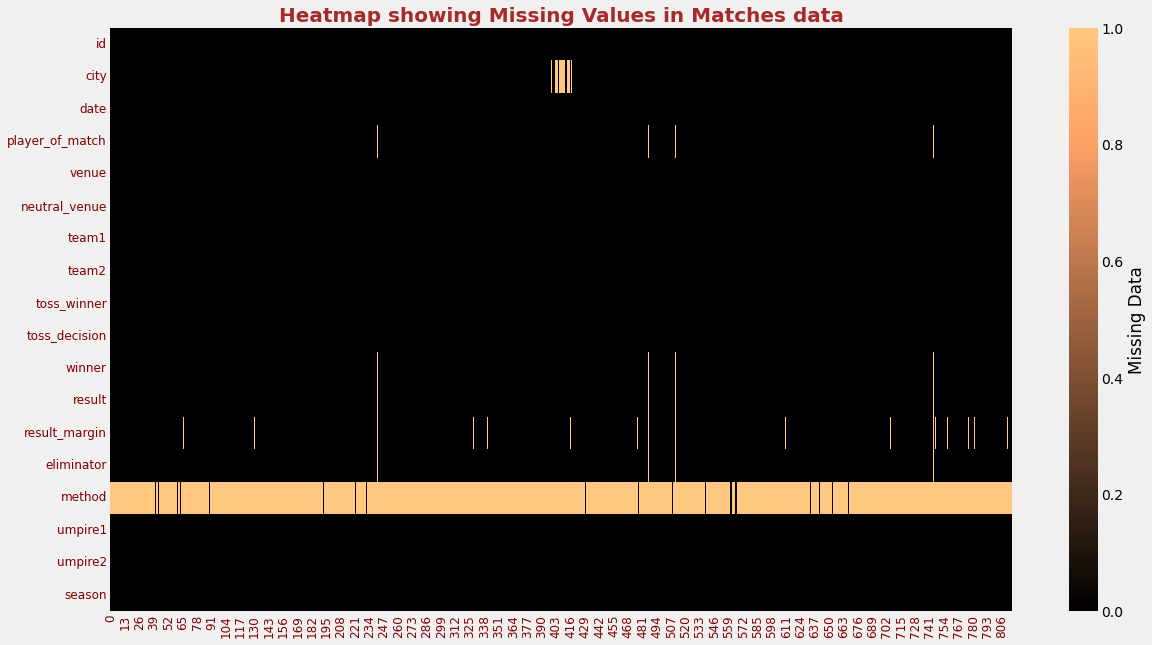

In [14]:
plt.figure(figsize=(18,16))
sns.displot(
    data=matches.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette='copper' 
)
plt.title('Bar plot showing Non-Missing Values in Matches data', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');

plt.figure(figsize=(18,10))
sns.heatmap(matches.isna().transpose(),
            cmap="copper",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values in Matches data', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, color = 'maroon')
plt.yticks(size = 12, color = 'maroon')
plt.show();

**From this we can see that the method column has the most number of missing values with majority of them missing. First let us see what the method column contains**

In [15]:
cd=matches.dropna(subset=['method'])
cd.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
40,336022,Delhi,2008-05-17,DPMD Jayawardene,Feroz Shah Kotla,0,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,N,D/L,AV Jayaprakash,RE Koertzen,2008
43,336025,Kolkata,2008-05-18,M Ntini,Eden Gardens,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,N,D/L,Asad Rauf,K Hariharan,2008
60,392183,Cape Town,2009-04-19,DL Vettori,Newlands,1,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,N,D/L,MR Benson,SD Ranade,2009
63,392186,Durban,2009-04-21,CH Gayle,Kingsmead,1,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,runs,11.0,N,D/L,DJ Harper,SD Ranade,2009
89,392214,Centurion,2009-05-07,ML Hayden,SuperSport Park,1,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,N,D/L,DJ Harper,TH Wijewardene,2009


**The Duckworth–Lewis method (often written as D/L method) is a mathematical formulation designed to calculate the target score for the team batting second in a limited overs cricket match interrupted by weather or other circumstances. It is generally accepted to be the most accurate method of setting a target score.**

<Figure size 1296x1152 with 0 Axes>

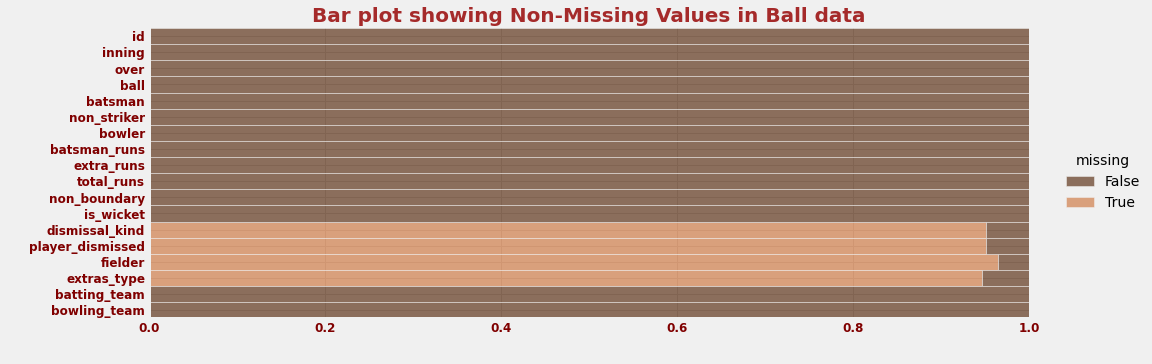

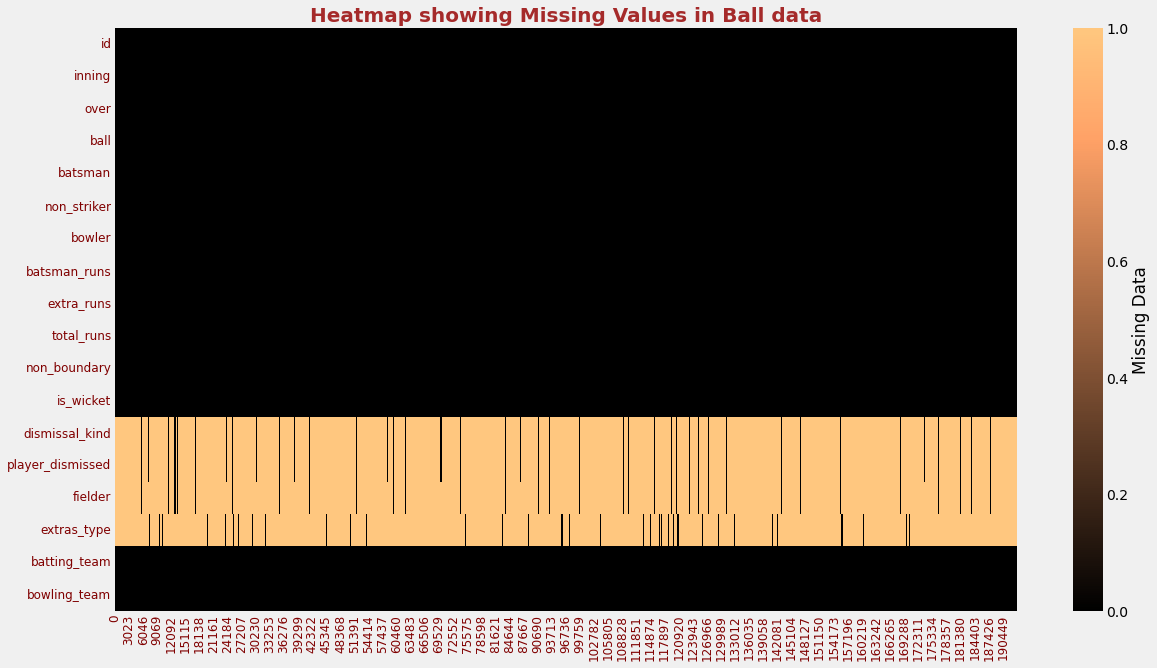

In [16]:
plt.figure(figsize=(18,16))
sns.displot(
    data=ball.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=3,
    palette='copper' 
)
plt.title('Bar plot showing Non-Missing Values in Ball data', weight = 'bold', size = 20, color = 'brown')
plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks(size = 12, weight = 'bold', color = 'maroon')
plt.yticks(size = 12, weight = 'bold', color = 'maroon');

plt.figure(figsize=(18,10))
sns.heatmap(ball.isna().transpose(),
            cmap="copper",
            cbar_kws={'label': 'Missing Data'})
plt.title('Heatmap showing Missing Values in Ball data', weight = 'bold', size = 20, color = 'brown')
plt.xticks(size = 12, color = 'maroon')
plt.yticks(size = 12, color = 'maroon')
plt.show();

**Almost all of the data is missing in the 'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type' columns. this could be due to information getting lost or not being recorded properly**

<AxesSubplot:>

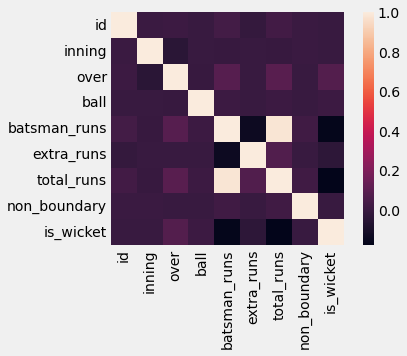

In [17]:
sns.heatmap(ball.corr(), square=True)

**There isnt much correlation between these factors which makes sense.**

# **Most Runs Scored**

In [18]:
mostruns=ball.groupby(['id'])['total_runs'].sum().reset_index()
mostruns=mostruns.sort_values(by = 'total_runs', ascending=False)
display(mostruns)

,id,total_runs
146,419137,469
679,1136604,459
626,1082641,453
791,1216527,449
1,335983,447
...,...,...
411,729305,141
611,1082626,135
39,336021,135
744,1178424,103


In [19]:
merged_df=mostruns[['id', 'total_runs']].merge(matches, left_on='id', right_on='id', how='left')
merged_df.head()

,id,total_runs,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,419137,469,Chennai,2010-04-03,M Vijay,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Chennai Super Kings,runs,23.0,N,NaN,RE Koertzen,RB Tiffin,2010
1,1136604,459,Indore,2018-05-12,SP Narine,Holkar Cricket Stadium,0,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,field,Kolkata Knight Riders,runs,31.0,N,NaN,VK Sharma,CK Nandan,2018
2,1082641,453,Mumbai,2017-05-11,WP Saha,Wankhede Stadium,0,Mumbai Indians,Kings XI Punjab,Mumbai Indians,field,Kings XI Punjab,runs,7.0,N,NaN,A Deshmukh,A Nand Kishore,2017
3,1216527,449,Sharjah,2020-09-27,SV Samson,Sharjah Cricket Stadium,0,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,NaN,RK Illingworth,K Srinivasan,2020
4,335983,447,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008


**From this we can see that the most runs scored in a match are 469 and it was during the 2010 match between CSK and Rajasthan Royals**

# **Most runs scored by batsmen**

In [20]:
batsmanruns=ball.groupby(['batsman'])['total_runs'].sum().reset_index()
batsmanruns = batsmanruns.sort_values(["total_runs"], ascending=False)
topbm=batsmanruns[:10]
display(batsmanruns)
display(topbm)

,batsman,total_runs
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394
...,...,...
387,RR Bhatkal,0
91,C Nanda,0
413,S Lamichhane,0
506,V Pratap Singh,0


,batsman,total_runs
505,V Kohli,6081
438,SK Raina,5604
116,DA Warner,5522
407,S Dhawan,5452
379,RG Sharma,5394
96,CH Gayle,5103
24,AB de Villiers,5016
398,RV Uthappa,4878
301,MS Dhoni,4855
154,G Gambhir,4479


<AxesSubplot:xlabel='batsman'>

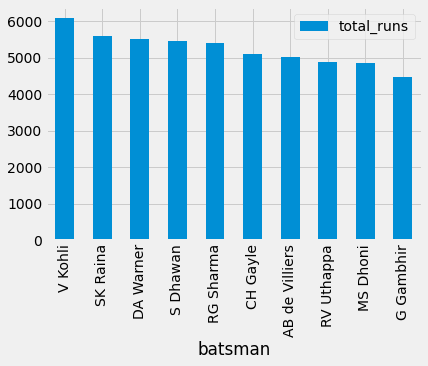

In [21]:
topbm.set_index('batsman', inplace=True)
topbm.plot(kind='bar')

**Thus we can see that the most number of runs were scored by Virat Kohli**

# **Role of Toss**

In [22]:
toss = matches.toss_winner == matches.winner
toss.value_counts()

True     418
False    398
dtype: int64

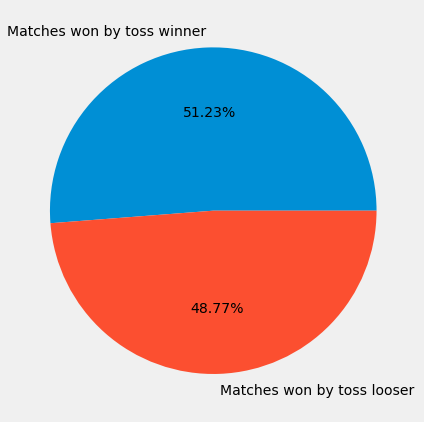

In [23]:
toss_data = { "Matches won by toss winner" : 418,
              "Matches won by toss looser" : 398}
toss_data = pd.Series(toss_data)
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(7,7))
plt.pie(x=toss_data,autopct="%.2f%%",labels=toss_data.index);

**Therefore toss does play a slight role in determining if a team would win the match or not.**

# **Matches Won by Teams**

Text(0.5, 1.0, 'Matches won by the Teams')

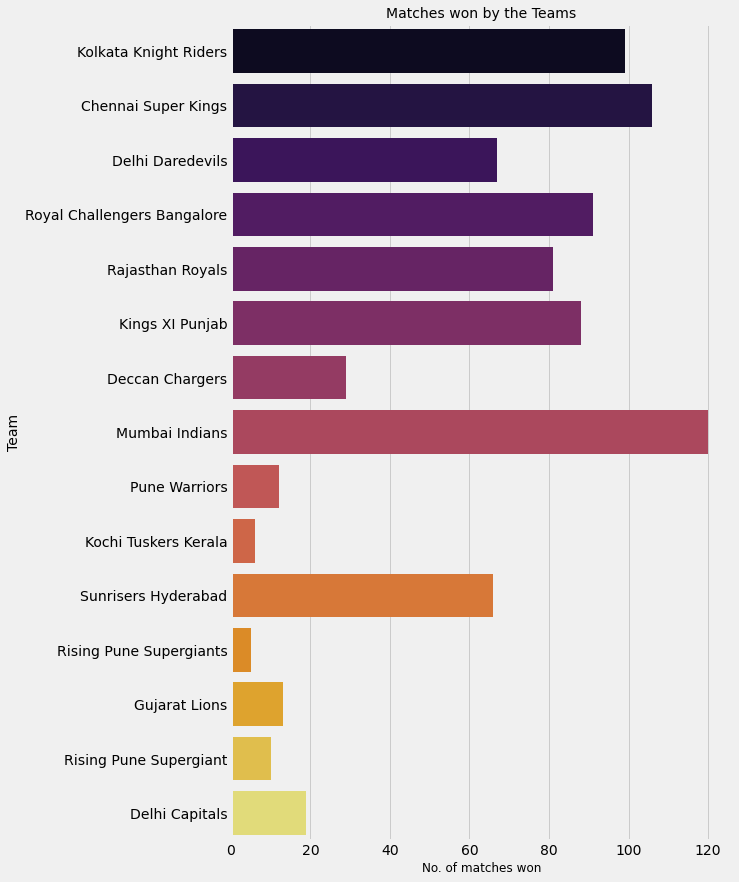

In [24]:
plt.figure(figsize=(8,14))
sns.countplot(y='winner',data=matches, palette='inferno')
plt.xlabel('No. of matches won',fontsize=12)
plt.ylabel('Team',fontsize=14)
plt.title('Matches won by the Teams',fontsize=14)


# **Matched Played in a Season**

Text(0.5, 1.0, 'Matches per season')

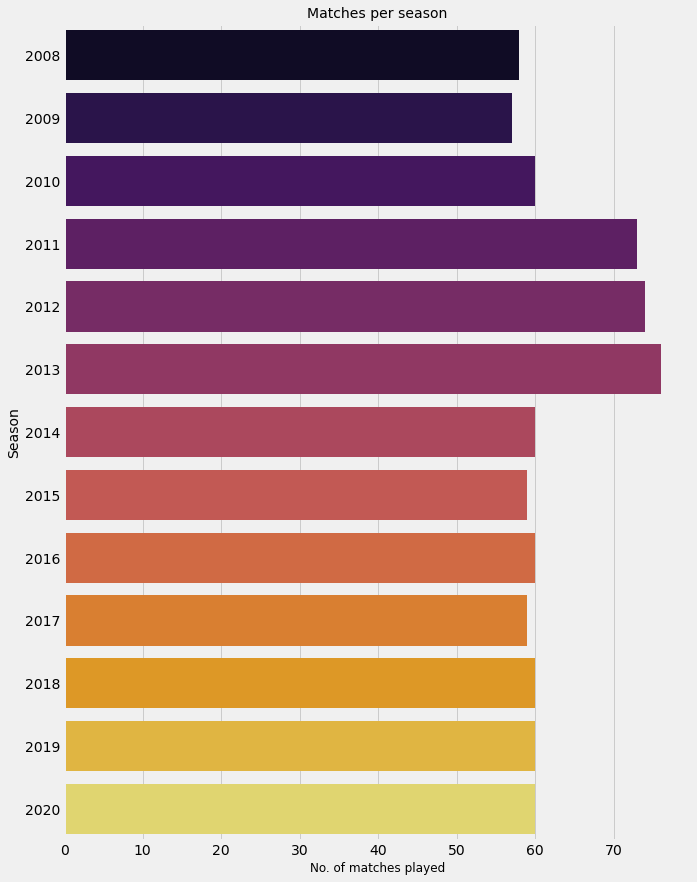

In [25]:
plt.figure(figsize=(10,14))
sns.countplot(y='season',data=matches, palette='inferno')
plt.xlabel('No. of matches played',fontsize=12)
plt.ylabel('Season',fontsize=14)
plt.title('Matches per season',fontsize=14)

**Thus most matches were played in 2013.**